In [14]:
import pandas as pd
import os

In [15]:
# Path to the Parquet file
file_path = 'combined_dataset.parquet'
# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
# Display the first few rows
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08              2.0   
1         1  2023-11-01 00:03:28   2023-11-01 00:23:59              0.0   
2         2  2023-10-31 23:58:05   2023-11-01 00:54:03              4.0   
3         2  2023-11-01 00:03:50   2023-11-01 00:04:59              1.0   
4         2  2023-11-01 00:06:30   2023-11-01 00:14:25              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          13.60         1.0                  N           132            26   
1           3.50         1.0                  N           140             7   
2          18.61         2.0                  N           132           230   
3           0.39         1.0                  N           236           236   
4           1.20         1.0                  N           236           141   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [6]:
zones = df["PULocationID"].unique()
for i in range (264):
    if i not in zones:
        print(i)

zones.max()

0
103
104


265

: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline

# Display first five rows
print("First five rows:")
print(df.head())

# Display data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

First five rows:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08              2.0   
1         1  2023-11-01 00:03:28   2023-11-01 00:23:59              0.0   
2         2  2023-10-31 23:58:05   2023-11-01 00:54:03              4.0   
3         2  2023-11-01 00:03:50   2023-11-01 00:04:59              1.0   
4         2  2023-11-01 00:06:30   2023-11-01 00:14:25              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          13.60         1.0                  N           132            26   
1           3.50         1.0                  N           140             7   
2          18.61         2.0                  N           132           230   
3           0.39         1.0                  N           236           236   
4           1.20         1.0                  N           236           141   

   payment_type  fare_amount  extra  mta_tax  tip_amount 

In [16]:
len(df)

36737491

In [4]:
# 2. Data Cleaning

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          2997372
trip_distance                  0
RatecodeID               2997372
store_and_fwd_flag       2997372
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     2997372
Airport_fee              2997372
dtype: int64


In [9]:
# percentage of null values for columns that have nulls
(2997372/len(df))*100

8.158891416945158

In [10]:
# Drop duplicates if any
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\nDropped {initial_shape[0] - df.shape[0]} duplicate rows.")


Dropped 4 duplicate rows.


In [11]:
# 3. Feature Engineering

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract hour and day of week from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

In [12]:
# Removing unnecessary columns to reduce the size of the data
# List of columns to keep
columns_to_keep = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_duration', 'pickup_hour', 'pickup_day_of_week',
    'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
    'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount'
]

# Filter the dataset to only include the columns to keep
filtered_df = df[columns_to_keep]

filtered_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,pickup_hour,pickup_day_of_week,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount
0,1,2023-11-01 00:03:03,2023-11-01 01:04:08,61.083333,0,Wednesday,2.0,13.60,1.0,132,26,2,61.8,0.00,66.05
1,1,2023-11-01 00:03:28,2023-11-01 00:23:59,20.516667,0,Wednesday,0.0,3.50,1.0,140,7,1,20.5,5.10,30.60
2,2,2023-10-31 23:58:05,2023-11-01 00:54:03,55.966667,23,Tuesday,4.0,18.61,2.0,132,230,1,70.0,16.54,99.23
3,2,2023-11-01 00:03:50,2023-11-01 00:04:59,1.150000,0,Wednesday,1.0,0.39,1.0,236,236,1,4.4,1.88,11.28
4,2,2023-11-01 00:06:30,2023-11-01 00:14:25,7.916667,0,Wednesday,1.0,1.20,1.0,236,141,1,10.0,3.00,18.00


In [13]:
# Saving the filtered dataset
filtered_df.to_parquet('filtered_df.parquet', engine='pyarrow', index=False)

In [14]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(filtered_df.describe())


Summary Statistics:


           VendorID           tpep_pickup_datetime  \
count  3.673749e+07                       36737487   
mean   1.759499e+00  2024-04-17 09:15:53.714755328   
min    1.000000e+00            2002-12-31 16:46:07   
25%    2.000000e+00            2024-01-26 23:04:48   
50%    2.000000e+00            2024-04-18 11:48:20   
75%    2.000000e+00     2024-07-07 15:37:07.500000   
max    6.000000e+00            2026-06-26 23:53:12   
std    4.288054e-01                            NaN   

               tpep_dropoff_datetime  trip_duration   pickup_hour  \
count                       36737487   3.673749e+07  3.673749e+07   
mean   2024-04-17 09:33:15.008175104   1.735489e+01  1.431684e+01   
min              2002-12-31 17:24:07  -2.353833e+02  0.000000e+00   
25%              2024-01-26 23:20:43   7.750000e+00  1.100000e+01   
50%              2024-04-18 12:08:02   1.285000e+01  1.500000e+01   
75%              2024-07-07 15:55:53   2.088333e+01  1.900000e+01   
max              2026-06-27 20

## Cleaning anomalies from dataset

In [16]:
# Filter for records within the specified date range
start_date = '2023-11-1'
end_date = '2024-09-30'

filtered_df = filtered_df[(filtered_df['tpep_pickup_datetime'] >= start_date) & 
                          (filtered_df['tpep_pickup_datetime'] <= end_date)]

# Fix 1: Remove negative and extreme values for fare_amount, tip_amount, total_amount
filtered_df = filtered_df[(filtered_df['fare_amount'] > 0) & (filtered_df['fare_amount'] < 1000)]
filtered_df = filtered_df[(filtered_df['total_amount'] > 0) & (filtered_df['total_amount'] < 1500)]
filtered_df = filtered_df[(filtered_df['tip_amount'] >= 0) & (filtered_df['tip_amount'] < 500)]

# Fix 2: Remove negative trip durations and recalculate
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60
filtered_df = filtered_df[filtered_df['trip_duration'] > 0]

# Fix 3: Remove extreme trip distances
filtered_df = filtered_df[(filtered_df['trip_distance'] > 0) & (filtered_df['trip_distance'] < 100)]

# Fix 4: Cap passenger_count and handle zero values
filtered_df = filtered_df[(filtered_df['passenger_count'] > 0) & (filtered_df['passenger_count'] <= 6)]

# Fix 5: Filter invalid RatecodeID values
filtered_df = filtered_df[filtered_df['RatecodeID'].between(1, 6)]

# Fix 6: Remove invalid payment_type values
filtered_df = filtered_df[filtered_df['payment_type'].between(1, 5)]

# Fix 7: Remove rows with zero or missing critical values
filtered_df = filtered_df[(filtered_df['trip_distance'] > 0) & (filtered_df['fare_amount'] > 0)]

# Summary of cleaned data
print(filtered_df.describe())


           VendorID           tpep_pickup_datetime  \
count  3.169223e+07                       31692231   
mean   1.774677e+00  2024-04-13 23:39:02.056090368   
min    1.000000e+00            2023-11-01 00:00:03   
25%    2.000000e+00     2024-01-22 09:18:40.500000   
50%    2.000000e+00            2024-04-14 12:25:02   
75%    2.000000e+00     2024-07-03 13:48:15.500000   
max    2.000000e+00            2024-09-29 23:59:58   
std    4.177946e-01                            NaN   

               tpep_dropoff_datetime  trip_duration   pickup_hour  \
count                       31692231   3.169223e+07  3.169223e+07   
mean   2024-04-13 23:56:14.619572992   1.720939e+01  1.440057e+01   
min              2023-11-01 00:02:05   1.666667e-02  0.000000e+00   
25%              2024-01-22 09:36:08   7.666667e+00  1.100000e+01   
50%              2024-04-14 12:40:12   1.260000e+01  1.500000e+01   
75%              2024-07-03 14:05:05   2.056667e+01  1.900000e+01   
max              2024-10-02 17

In [17]:
# Filter out unrealistic trip durations (e.g., >120 minutes or <1 minute)
filtered_df = filtered_df[(filtered_df['trip_duration'] >= 1) & (filtered_df['trip_duration'] <= 120)]

# Filter out trips with suspiciously low or high trip distances measured in miles
filtered_df = filtered_df[(filtered_df['trip_distance'] >= 0.1) & (filtered_df['trip_distance'] <= 50)]

# Remove rows with fare amounts below $2.5 or extreme values
filtered_df = filtered_df[(filtered_df['fare_amount'] >= 2.5) & (filtered_df['fare_amount'] <= 500)]

# Remove rows with extreme tip amounts (e.g., above $100)
filtered_df = filtered_df[filtered_df['tip_amount'] <= 100]

# Remove rows with total amounts below a minimum threshold or extreme values
filtered_df = filtered_df[(filtered_df['total_amount'] >= 2.5) & (filtered_df['total_amount'] <= 1000)]

In [18]:
print(filtered_df.describe())

           VendorID           tpep_pickup_datetime  \
count  3.152815e+07                       31528148   
mean   1.773936e+00  2024-04-13 23:06:35.877974272   
min    1.000000e+00            2023-11-01 00:00:03   
25%    2.000000e+00            2024-01-22 09:20:58   
50%    2.000000e+00     2024-04-14 11:36:22.500000   
75%    2.000000e+00  2024-07-03 12:59:11.750000128   
max    2.000000e+00            2024-09-29 23:59:58   
std    4.182814e-01                            NaN   

               tpep_dropoff_datetime  trip_duration   pickup_hour  \
count                       31528148   3.152815e+07  3.152815e+07   
mean   2024-04-13 23:22:58.628143616   1.637917e+01  1.440399e+01   
min              2023-11-01 00:02:29   1.000000e+00  0.000000e+00   
25%              2024-01-22 09:37:52   7.716667e+00  1.100000e+01   
50%              2024-04-14 11:50:08   1.263333e+01  1.500000e+01   
75%              2024-07-03 13:15:21   2.058333e+01  1.900000e+01   
max              2024-09-30 00

In [19]:
# Saving the filtered dataset
filtered_df.to_parquet('filtered_df_2.parquet', engine='pyarrow', index=False)

### 4. Univariate Analysis


In [20]:
# Check for missing values
print("\nMissing Values:")
print(filtered_df.isnull().sum())

print(f"Number of datapoints: {len(filtered_df)}")


Missing Values:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_duration            0
pickup_hour              0
pickup_day_of_week       0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
tip_amount               0
total_amount             0
dtype: int64
Number of datapoints: 31528148


In [21]:
# Display the data types of each column
print(filtered_df.dtypes)

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_duration                   float64
pickup_hour                       int32
pickup_day_of_week               object
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
tip_amount                      float64
total_amount                    float64
dtype: object


## Multivariate Analysis

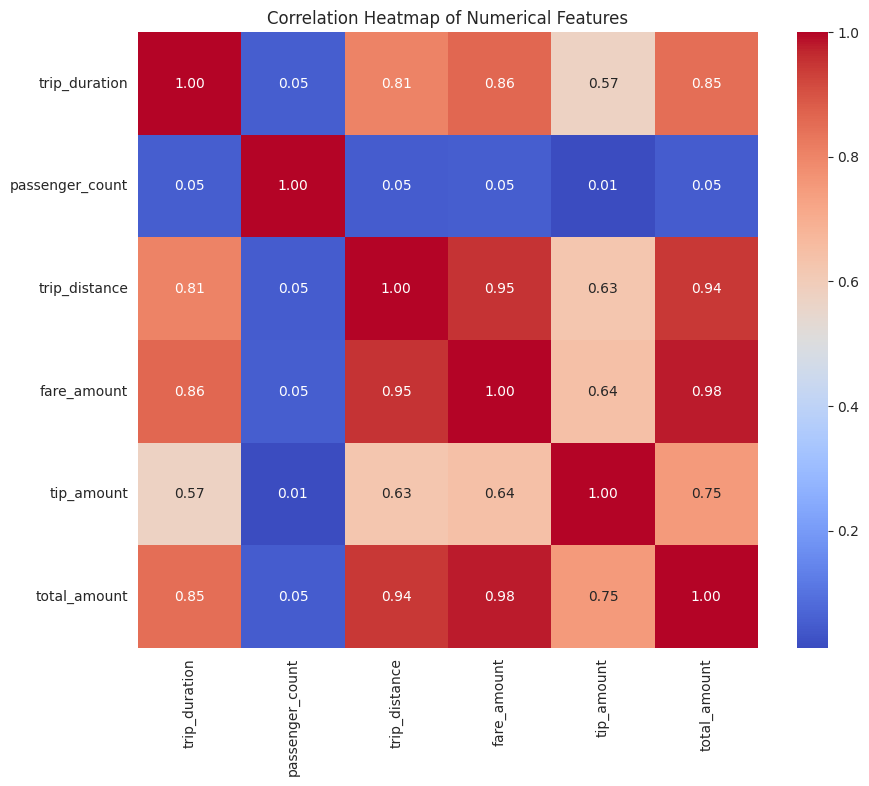

In [22]:
# 1. Correlation Heatmap for Numerical Features
def correlation_heatmap(filtered_df, numerical_features):
    plt.figure(figsize=(10, 8))
    corr = filtered_df[numerical_features].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

# Define numerical features
numerical_features = ['trip_duration', 'passenger_count', 'trip_distance',
                      'fare_amount', 'tip_amount', 'total_amount']

# Generate Correlation Heatmap
correlation_heatmap(filtered_df, numerical_features)

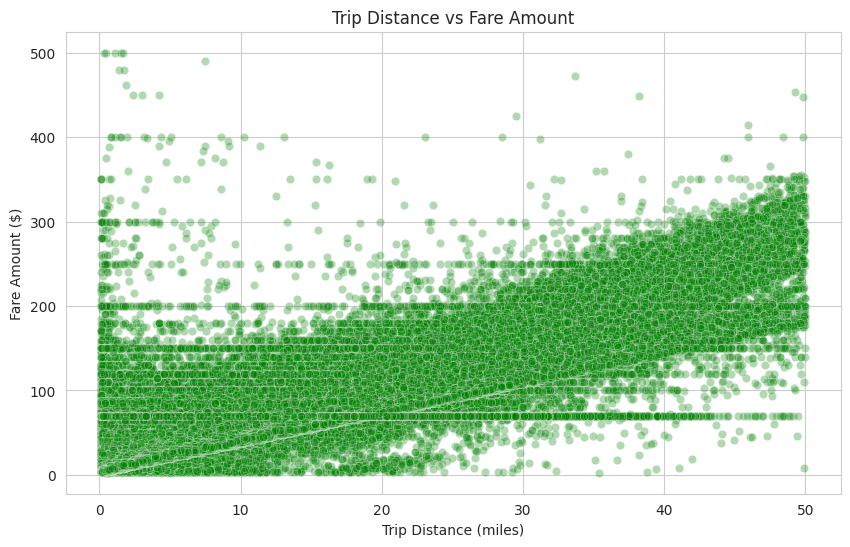

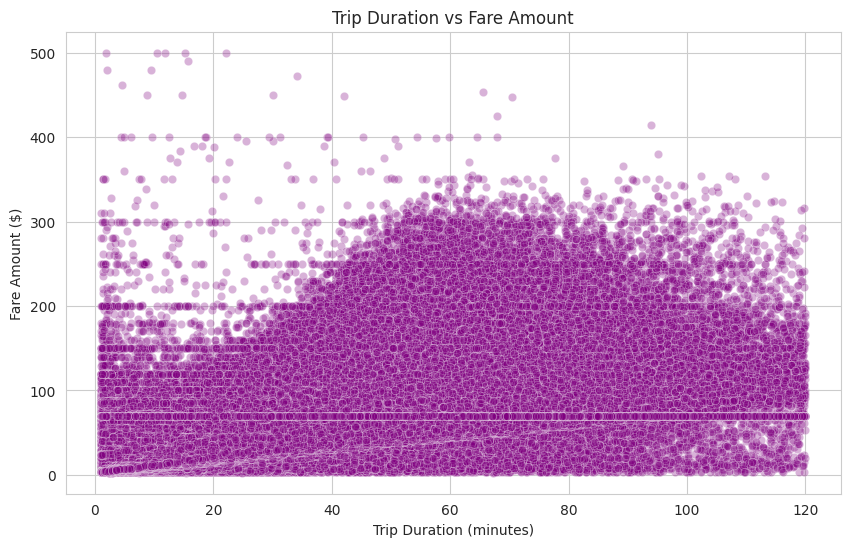

In [23]:
def scatter_plot(filtered_df, x, y, title, xlabel, ylabel, alpha=0.3, color='blue'):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=filtered_df, x=x, y=y, alpha=alpha, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Scatter Plot: Trip Distance vs Fare Amount
scatter_plot(filtered_df,
             x='trip_distance',
             y='fare_amount',
             title='Trip Distance vs Fare Amount',
             xlabel='Trip Distance (miles)',
             ylabel='Fare Amount ($)',
             color='green')

# Scatter Plot: Trip Duration vs Fare Amount
scatter_plot(filtered_df,
             x='trip_duration',
             y='fare_amount',
             title='Trip Duration vs Fare Amount',
             xlabel='Trip Duration (minutes)',
             ylabel='Fare Amount ($)',
             color='purple')

## Temporal Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Path to the Parquet file
file_path = 'filtered_df_2.parquet'
# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
# Display the first few rows
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_duration  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08      61.083333   
1         2  2023-11-01 00:03:50   2023-11-01 00:04:59       1.150000   
2         2  2023-11-01 00:06:30   2023-11-01 00:14:25       7.916667   
3         2  2023-11-01 00:17:18   2023-11-01 00:23:39       6.350000   
4         2  2023-11-01 00:14:49   2023-11-01 00:39:44      24.916667   

   pickup_hour pickup_day_of_week  passenger_count  trip_distance  RatecodeID  \
0            0          Wednesday              2.0          13.60         1.0   
1            0          Wednesday              1.0           0.39         1.0   
2            0          Wednesday              1.0           1.20         1.0   
3            0          Wednesday              3.0           0.60         1.0   
4            0          Wednesday              1.0           5.44         1.0   

   PULocationID  DOLocationID  payment_type  fare_amount  tip_amount  \
0 

In [3]:
# Aggregate the number of trips per day of the week
trips_per_day = df['pickup_day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Display the aggregated data
print("\nNumber of Trips per Day of the Week:")
print(trips_per_day)



Number of Trips per Day of the Week:
pickup_day_of_week
Monday       3875667
Tuesday      4496039
Wednesday    4840942
Thursday     5005043
Friday       4710789
Saturday     4671803
Sunday       3927865
Name: count, dtype: int64


/tmp/dcs-tmp.u2164966/ipykernel_1135486/65680615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_day.index, y=trips_per_day.values, palette='viridis')


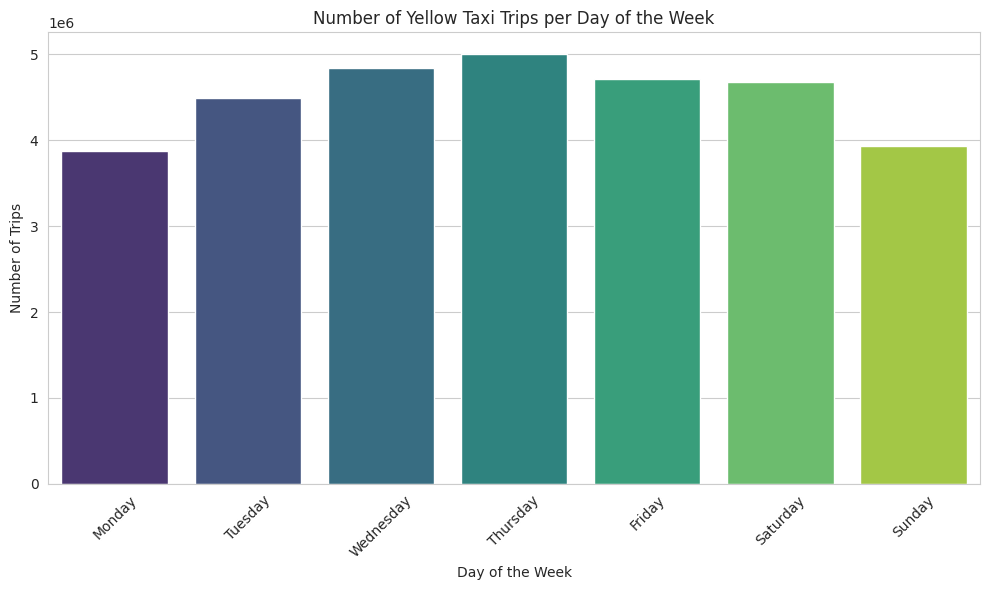

In [4]:
# Bar Plot: Number of Trips per Day of the Week
plt.figure(figsize=(10,6))
sns.barplot(x=trips_per_day.index, y=trips_per_day.values, palette='viridis')
plt.title('Number of Yellow Taxi Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Aggregate the number of trips per hour of the day
trips_per_hour = df['pickup_hour'].value_counts().sort_index()

# Display the aggregated data
print("\nNumber of Trips per Hour of the Day:")
print(trips_per_hour)


Number of Trips per Hour of the Day:
pickup_hour
0      854842
1      562236
2      368256
3      236612
4      145734
5      161080
6      389755
7      804109
8     1137318
9     1320528
10    1461303
11    1589528
12    1728414
13    1800877
14    1934672
15    1992674
16    2014545
17    2178751
18    2271019
19    2011506
20    1820753
21    1835696
22    1657746
23    1250194
Name: count, dtype: int64


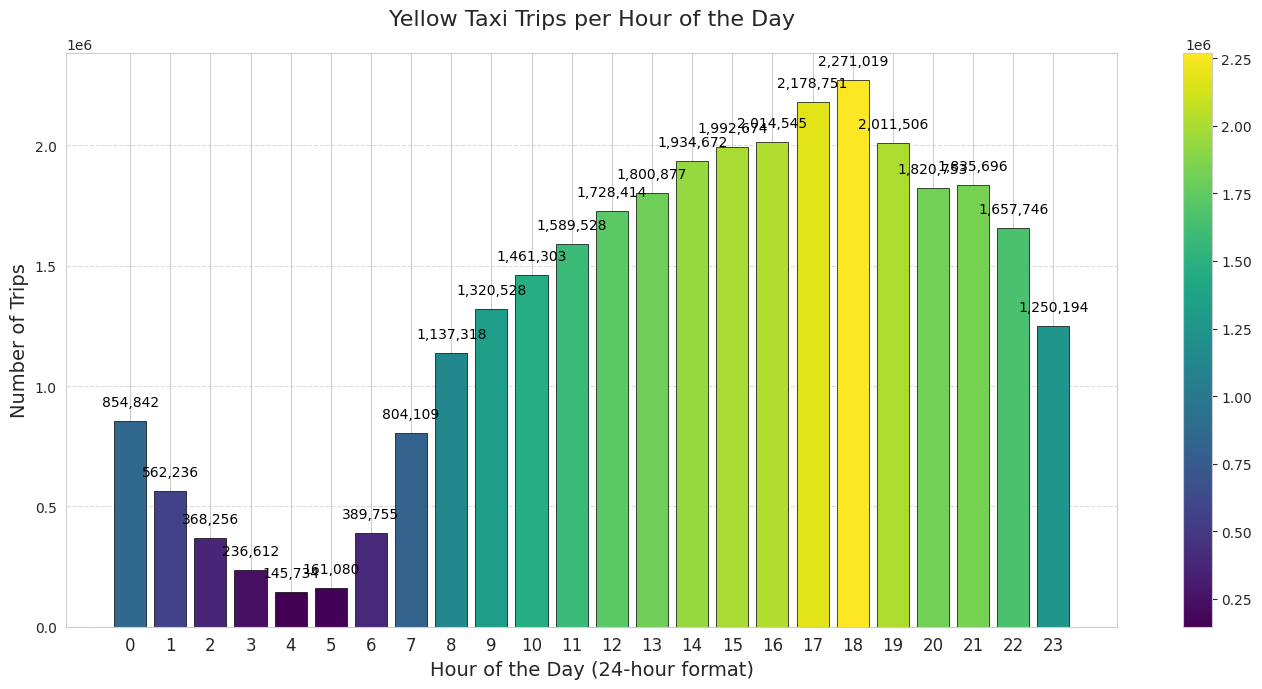

In [16]:
# Extract hours and trips
hours = trips_per_hour.index
trips = trips_per_hour.values

# Normalize trip counts for color mapping
norm = plt.Normalize(trips.min(), trips.max())
colors = cm.viridis(norm(trips))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Create the bar plot
bars = ax.bar(hours, trips, color=colors, edgecolor='black', linewidth=0.5)

# Add data labels above each bar
for bar, trip_count in zip(bars, trips):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50000,  # Offset for better readability
        f'{trip_count:,}',  # Add commas for thousands
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add a colorbar for the viridis colormap
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # Explicitly associate the colorbar with the current axis
cbar.set_label('Number of Trips (Color Intensity)', fontsize=12)

# Set axis labels and title
ax.set_xlabel('Hour of the Day (24-hour format)', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
ax.set_title('Yellow Taxi Trips per Hour of the Day', fontsize=16, pad=20)

# Adjust tick labels for clarity
ax.set_xticks(hours)
ax.set_xticklabels(hours, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

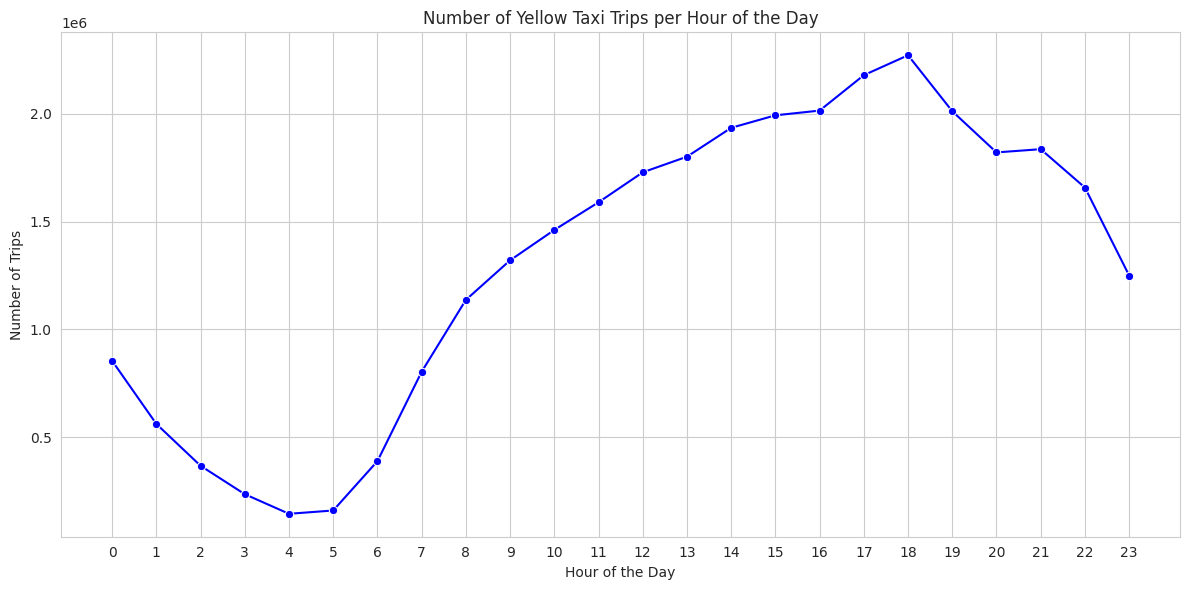

In [29]:
# Line Plot: Number of Trips per Hour of the Day
plt.figure(figsize=(12,6))
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, marker='o', color='blue')
plt.title('Number of Yellow Taxi Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))  # Ensure all 24 hours are displayed
plt.grid(True)
plt.tight_layout()
plt.show()

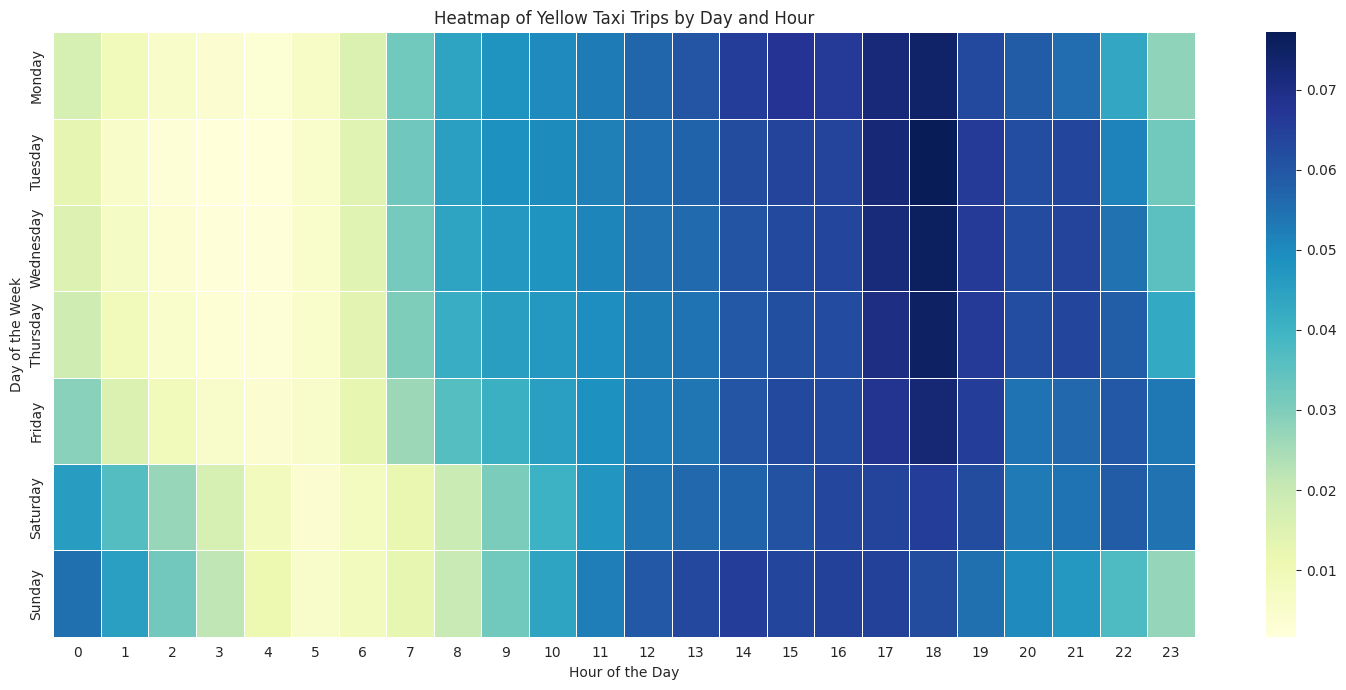

In [30]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='pickup_day_of_week', columns='pickup_hour', values='trip_duration', aggfunc='count').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


#!!! values='trip_duration', this is a bit sus, what does this mean, BUT AGGREGATION FNC IS COUNT 

# Normalize by total trips per day to get proportion
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Plot Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=False)
plt.title('Heatmap of Yellow Taxi Trips by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

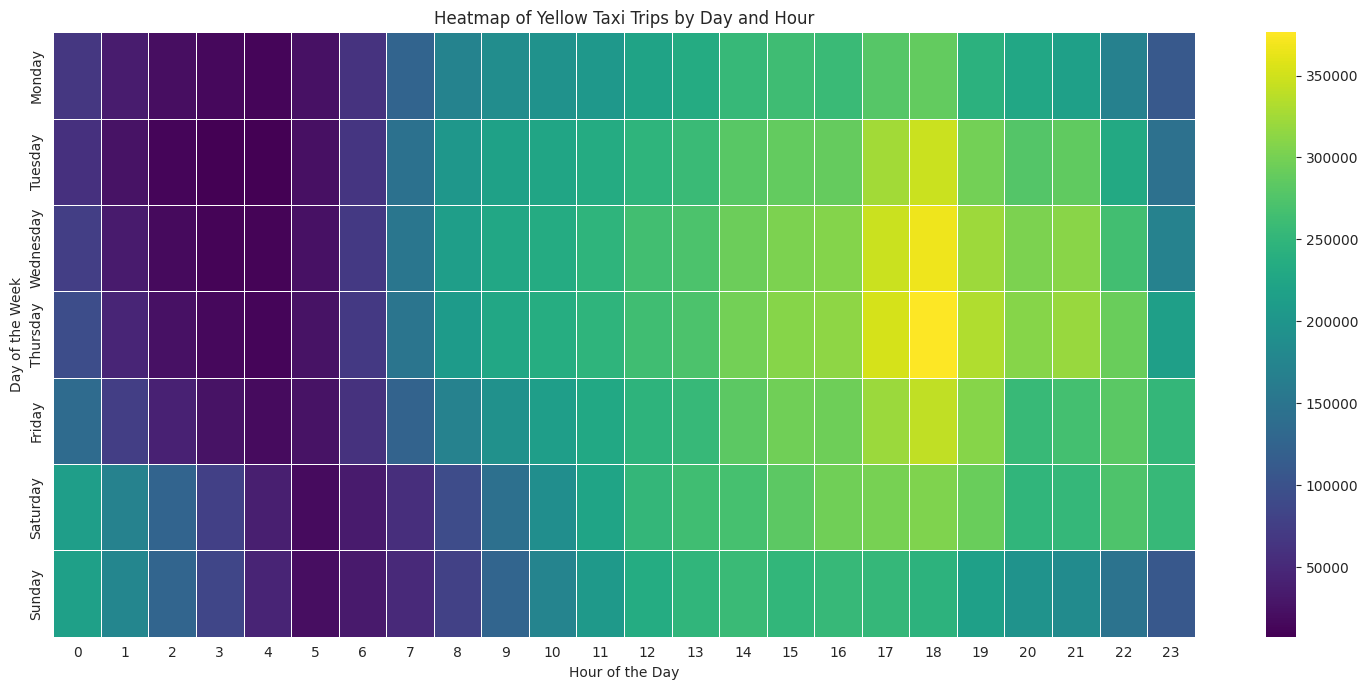

In [31]:
# Aggregate trips by day and hour
trips_day_hour = df.groupby(['pickup_day_of_week', 'pickup_hour']).size().reset_index(name='trip_count')

# Pivot for heatmap
trips_pivot = trips_day_hour.pivot(index='pickup_day_of_week', columns='pickup_hour', values='trip_count').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(trips_pivot, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Yellow Taxi Trips by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


In [32]:
# Find the hour with the maximum trips for each day
peak_hours = trips_day_hour.loc[trips_day_hour.groupby('pickup_day_of_week')['trip_count'].idxmax()]

print("\nPeak Hour for Each Day:")
print(peak_hours[['pickup_day_of_week', 'pickup_hour', 'trip_count']])



Peak Hour for Each Day:
    pickup_day_of_week  pickup_hour  trip_count
18              Friday           18      341780
42              Monday           18      287945
66            Saturday           18      305755
86              Sunday           14      257082
114           Thursday           18      376387
138            Tuesday           18      346941
162          Wednesday           18      367341


## Seasonal Trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [2]:
# Loading filtered_df_2
# Path to the Parquet file
file_path = 'filtered_df_2.parquet'
# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
# Display the first few rows
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_duration  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08      61.083333   
1         2  2023-11-01 00:03:50   2023-11-01 00:04:59       1.150000   
2         2  2023-11-01 00:06:30   2023-11-01 00:14:25       7.916667   
3         2  2023-11-01 00:17:18   2023-11-01 00:23:39       6.350000   
4         2  2023-11-01 00:14:49   2023-11-01 00:39:44      24.916667   

   pickup_hour pickup_day_of_week  passenger_count  trip_distance  RatecodeID  \
0            0          Wednesday              2.0          13.60         1.0   
1            0          Wednesday              1.0           0.39         1.0   
2            0          Wednesday              1.0           1.20         1.0   
3            0          Wednesday              3.0           0.60         1.0   
4            0          Wednesday              1.0           5.44         1.0   

   PULocationID  DOLocationID  payment_type  fare_amount  tip_amount  \
0 

In [3]:
# Convert 'tpep_pickup_datetime' to datetime if not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Set 'tpep_pickup_datetime' as the DataFrame index
df.set_index('tpep_pickup_datetime', inplace=True)

# Optional: Verify the index
print("DataFrame Index:")
print(df.index)

# 2. Resampling and Aggregation

# a. Monthly Aggregation
monthly_trips = df.resample('M').size()

# b. Weekly Aggregation
weekly_trips = df.resample('W').size()

# c. Daily Aggregation
daily_trips = df.resample('D').size()


DataFrame Index:
DatetimeIndex(['2023-11-01 00:03:03', '2023-11-01 00:03:50',
               '2023-11-01 00:06:30', '2023-11-01 00:17:18',
               '2023-11-01 00:14:49', '2023-11-01 00:07:29',
               '2023-11-01 00:39:20', '2023-11-01 00:21:12',
               '2023-11-01 00:05:14', '2023-11-01 00:47:33',
               ...
               '2024-09-29 23:00:29', '2024-09-29 23:07:35',
               '2024-09-29 23:27:20', '2024-09-29 23:56:30',
               '2024-09-29 23:57:42', '2024-09-29 23:58:10',
               '2024-09-29 23:56:13', '2024-09-29 23:56:50',
               '2024-09-29 23:45:18', '2024-09-29 23:58:07'],
              dtype='datetime64[ns]', name='tpep_pickup_datetime', length=31528148, freq=None)


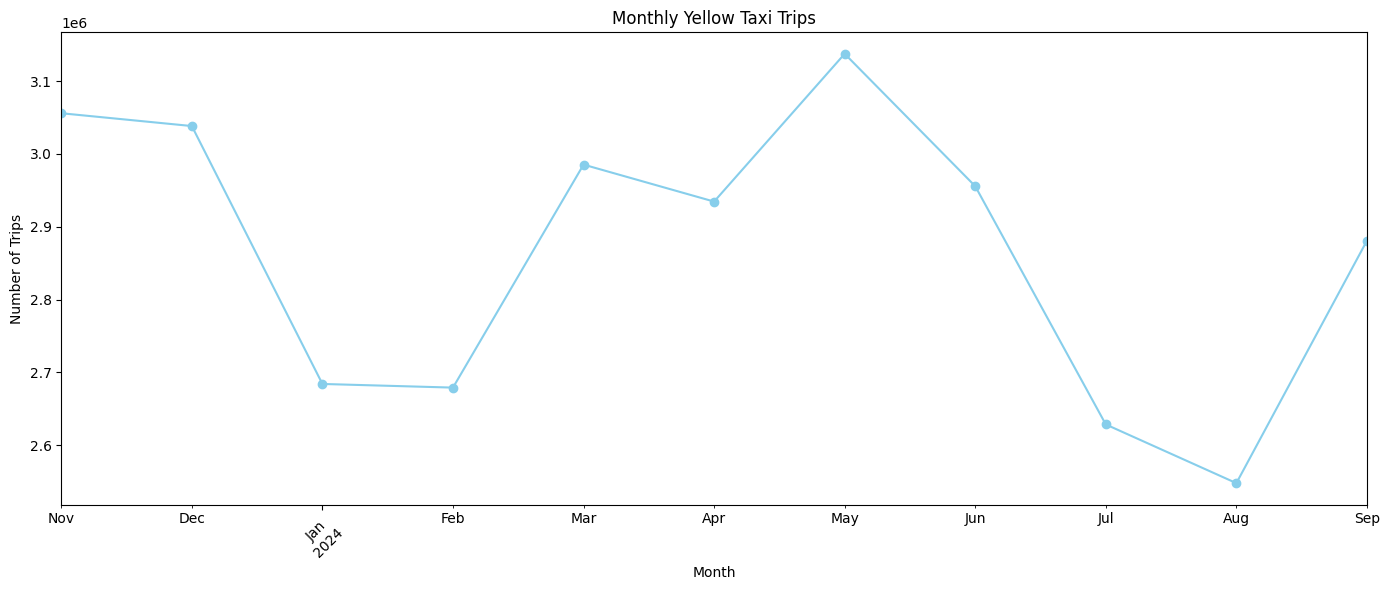

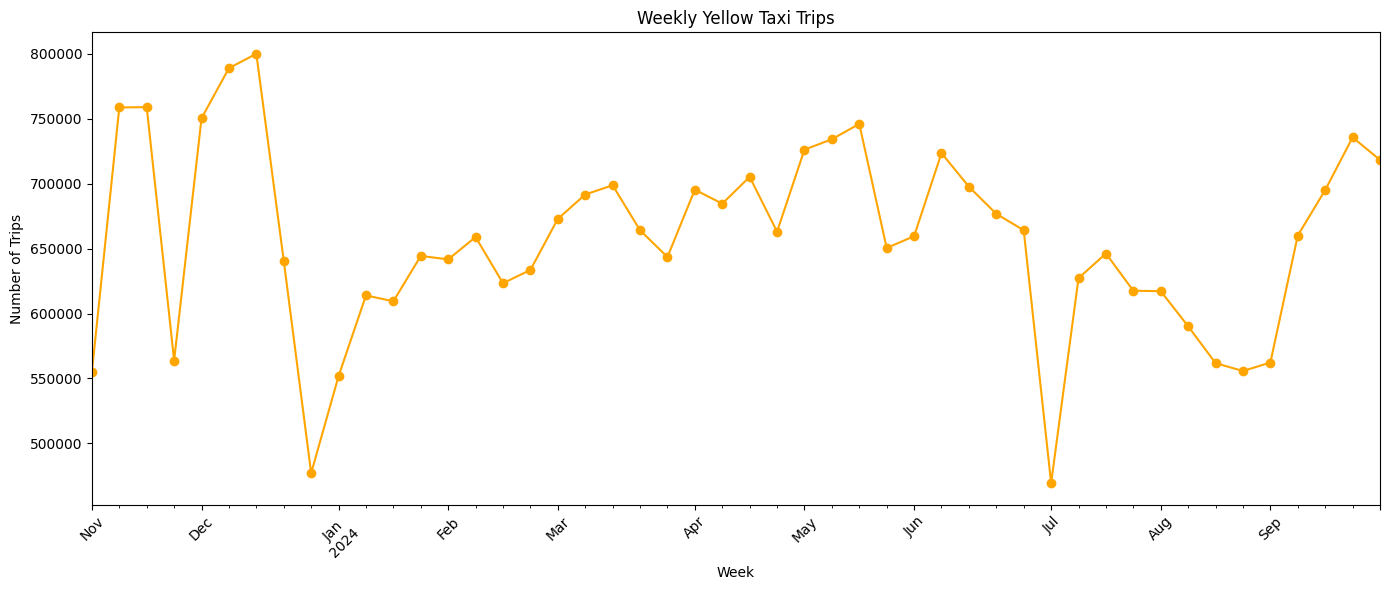

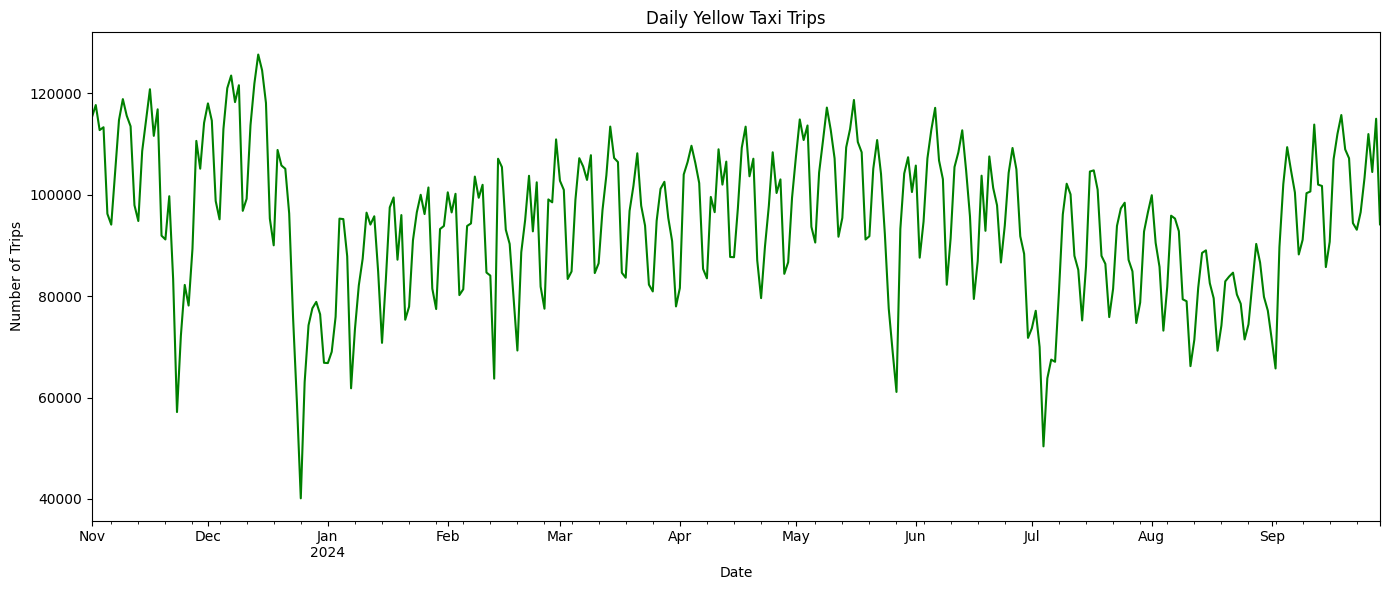

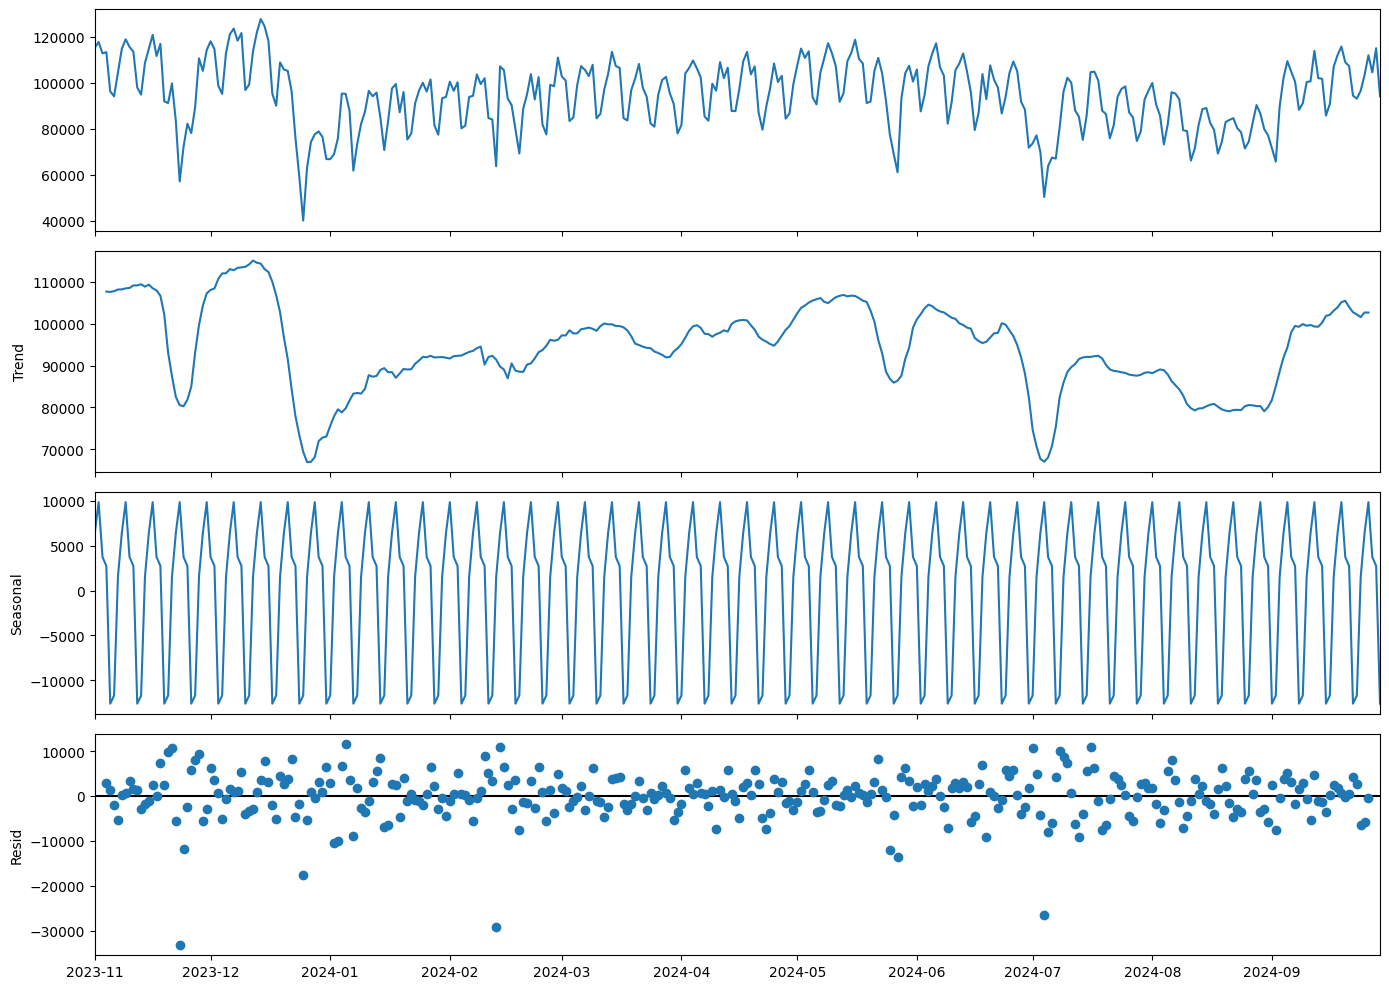

/tmp/dcs-tmp.u2164966/ipykernel_1037927/3300441233.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_season.index, y=monthly_season.values, palette='viridis')


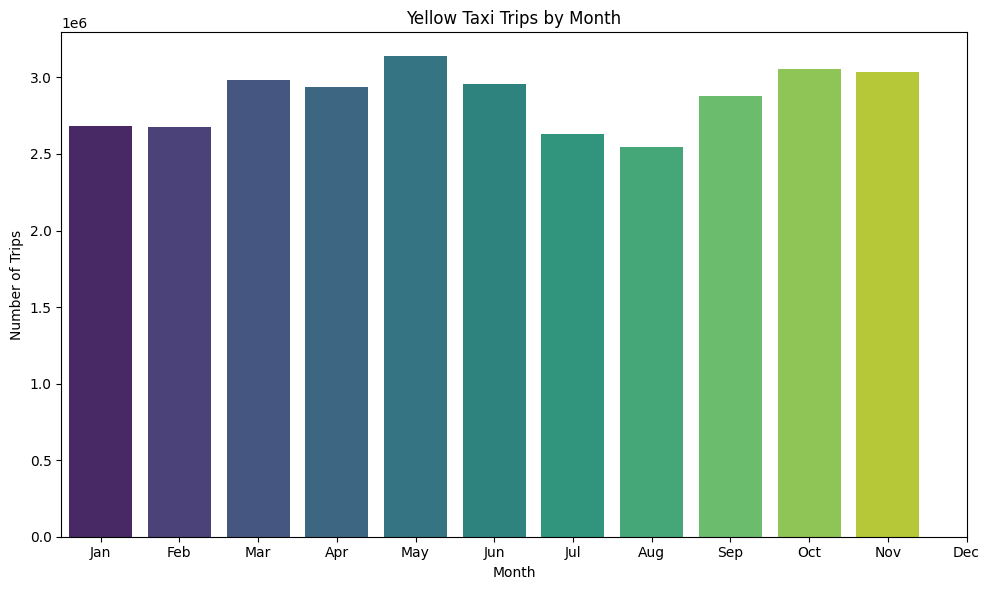

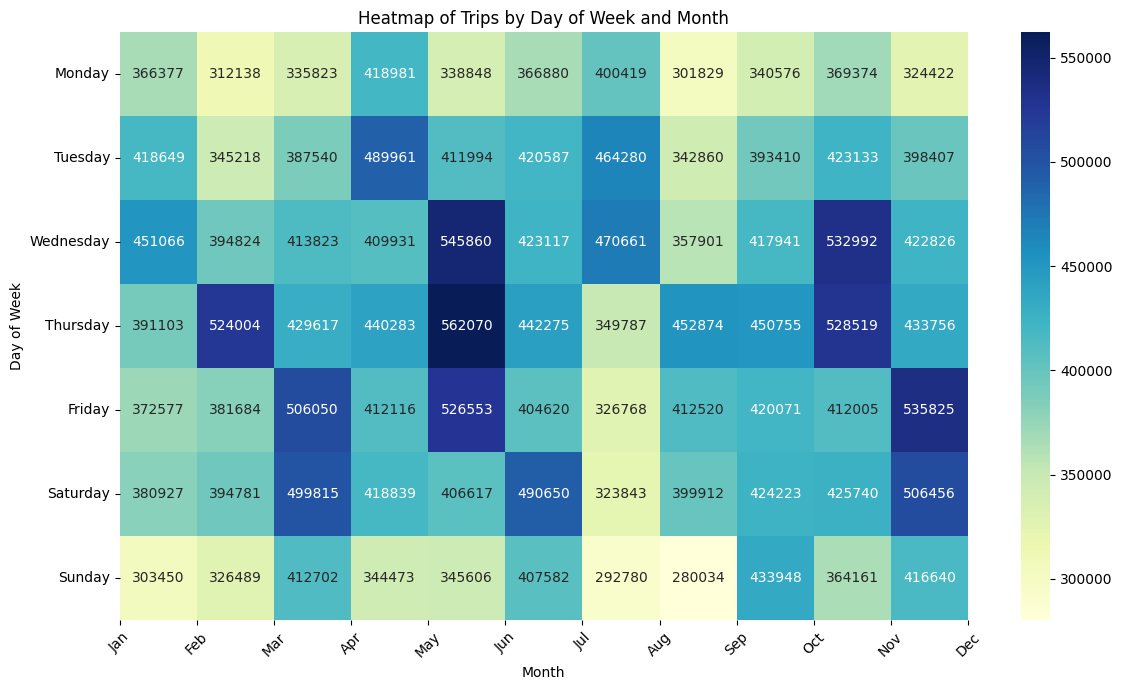

In [4]:

# 3. Visualization of Aggregated Data

# a. Monthly Trips
plt.figure(figsize=(14,6))
monthly_trips.plot(marker='o', color='skyblue')
plt.title('Monthly Yellow Taxi Trips')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b. Weekly Trips
plt.figure(figsize=(14,6))
weekly_trips.plot(marker='o', color='orange')
plt.title('Weekly Yellow Taxi Trips')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c. Daily Trips
plt.figure(figsize=(14,6))
daily_trips.plot(color='green')
plt.title('Daily Yellow Taxi Trips')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# 4. Time Series Decomposition

# For decomposition, it's ideal to have a frequency that captures seasonality.
# Let's perform decomposition on daily data assuming weekly seasonality.

# Ensure there are no missing dates
daily_trips = daily_trips.asfreq('D')

# Fill missing values with zero (no trips on that day)
daily_trips.fillna(0, inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(daily_trips, model='additive', period=7)  # Weekly seasonality

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

# 5. Seasonal Trend Analysis

# a. Seasonal Plot: Trips by Month
df['month'] = df.index.month
monthly_season = df.groupby('month').size()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_season.index, y=monthly_season.values, palette='viridis')
plt.title('Yellow Taxi Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                      'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

# b. Seasonal Plot: Trips by Day of Week and Month

# Create a pivot table
df['day_of_week'] = df.index.day_name()
seasonal_pivot = df.groupby(['day_of_week', 'month']).size().unstack()

# Reorder days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonal_pivot = seasonal_pivot.reindex(day_order)

# Plot Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(seasonal_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Trips by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                     'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
df['month'] = df.index.month
monthly_season = df.groupby('month').size()
monthly_season

month
1     2684149
2     2679138
3     2985370
4     2934584
5     3137548
6     2955711
7     2628538
8     2547930
9     2880924
11    3055924
12    3038332
dtype: int64

/tmp/dcs-tmp.u2164966/ipykernel_1037927/3619761532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months, y=counts, palette='viridis')


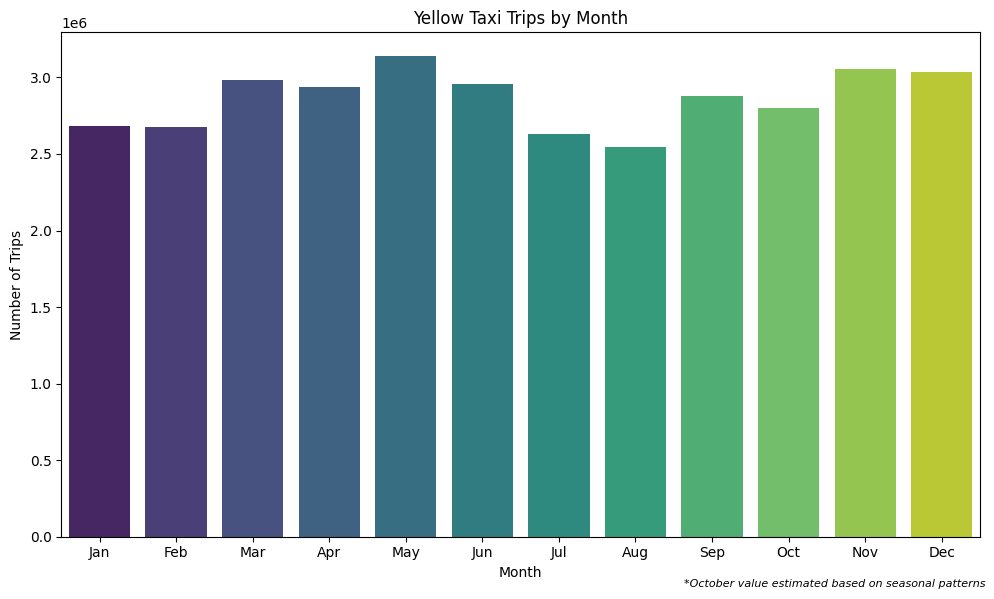

In [13]:
# Create a complete monthly series with estimated October data
monthly_values = {
    1: float(monthly_season[1]),  # January
    2: float(monthly_season[2]),  # February
    3: float(monthly_season[3]),  # March
    4: float(monthly_season[4]),  # April
    5: float(monthly_season[5]),  # May
    6: float(monthly_season[6]),  # June
    7: float(monthly_season[7]),  # July
    8: float(monthly_season[8]),  # August
    9: float(monthly_season[9]),  # September
    10: 2800000,  # October estimate based on seasonal patterns
    11: float(monthly_season[11]), # November
    12: 3038332 # December (no data)
}

# Create lists for plotting
months = list(monthly_values.keys())
counts = list(monthly_values.values())

plt.figure(figsize=(10,6))
sns.barplot(x=months, y=counts, palette='viridis')

plt.title('Yellow Taxi Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(0,12), 
          labels=['Jan','Feb','Mar','Apr','May','Jun',
                 'Jul','Aug','Sep','Oct','Nov','Dec'])

# Add annotation for estimated data
plt.figtext(0.99, 0.01, '*October value estimated based on seasonal patterns', 
            ha='right', va='bottom', fontsize=8, style='italic')

plt.tight_layout()
plt.show()

## Seasonal Trend Attempt 2

In [56]:
# Loading filtered_df_2
# Path to the Parquet file
file_path = 'filtered_df_2.parquet'
# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
# Display the first few rows
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  trip_duration  \
0         1  2023-11-01 00:03:03   2023-11-01 01:04:08      61.083333   
1         2  2023-11-01 00:03:50   2023-11-01 00:04:59       1.150000   
2         2  2023-11-01 00:06:30   2023-11-01 00:14:25       7.916667   
3         2  2023-11-01 00:17:18   2023-11-01 00:23:39       6.350000   
4         2  2023-11-01 00:14:49   2023-11-01 00:39:44      24.916667   

   pickup_hour pickup_day_of_week  passenger_count  trip_distance  RatecodeID  \
0            0          Wednesday              2.0          13.60         1.0   
1            0          Wednesday              1.0           0.39         1.0   
2            0          Wednesday              1.0           1.20         1.0   
3            0          Wednesday              3.0           0.60         1.0   
4            0          Wednesday              1.0           5.44         1.0   

   PULocationID  DOLocationID  payment_type  fare_amount  tip_amount  \
0 

In [7]:
# Extract time-based features
df['month'] = df['tpep_pickup_datetime'].dt.month  # Month number (1-12)

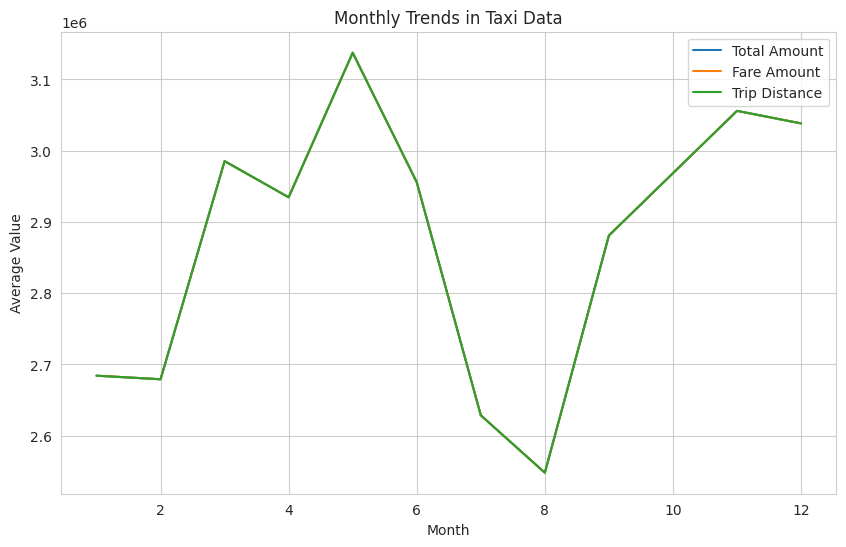

In [8]:
# Group data by month and aggregate metrics
monthly_trends = df.groupby('month').agg({
    'trip_duration': 'size',
    'trip_distance': 'size',
    'fare_amount': 'size',
    'total_amount': 'size'
}).reset_index()

# Plot trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trends, x='month', y='total_amount', label='Total Amount')
sns.lineplot(data=monthly_trends, x='month', y='fare_amount', label='Fare Amount')
sns.lineplot(data=monthly_trends, x='month', y='trip_distance', label='Trip Distance')
plt.title('Monthly Trends in Taxi Data')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.show()


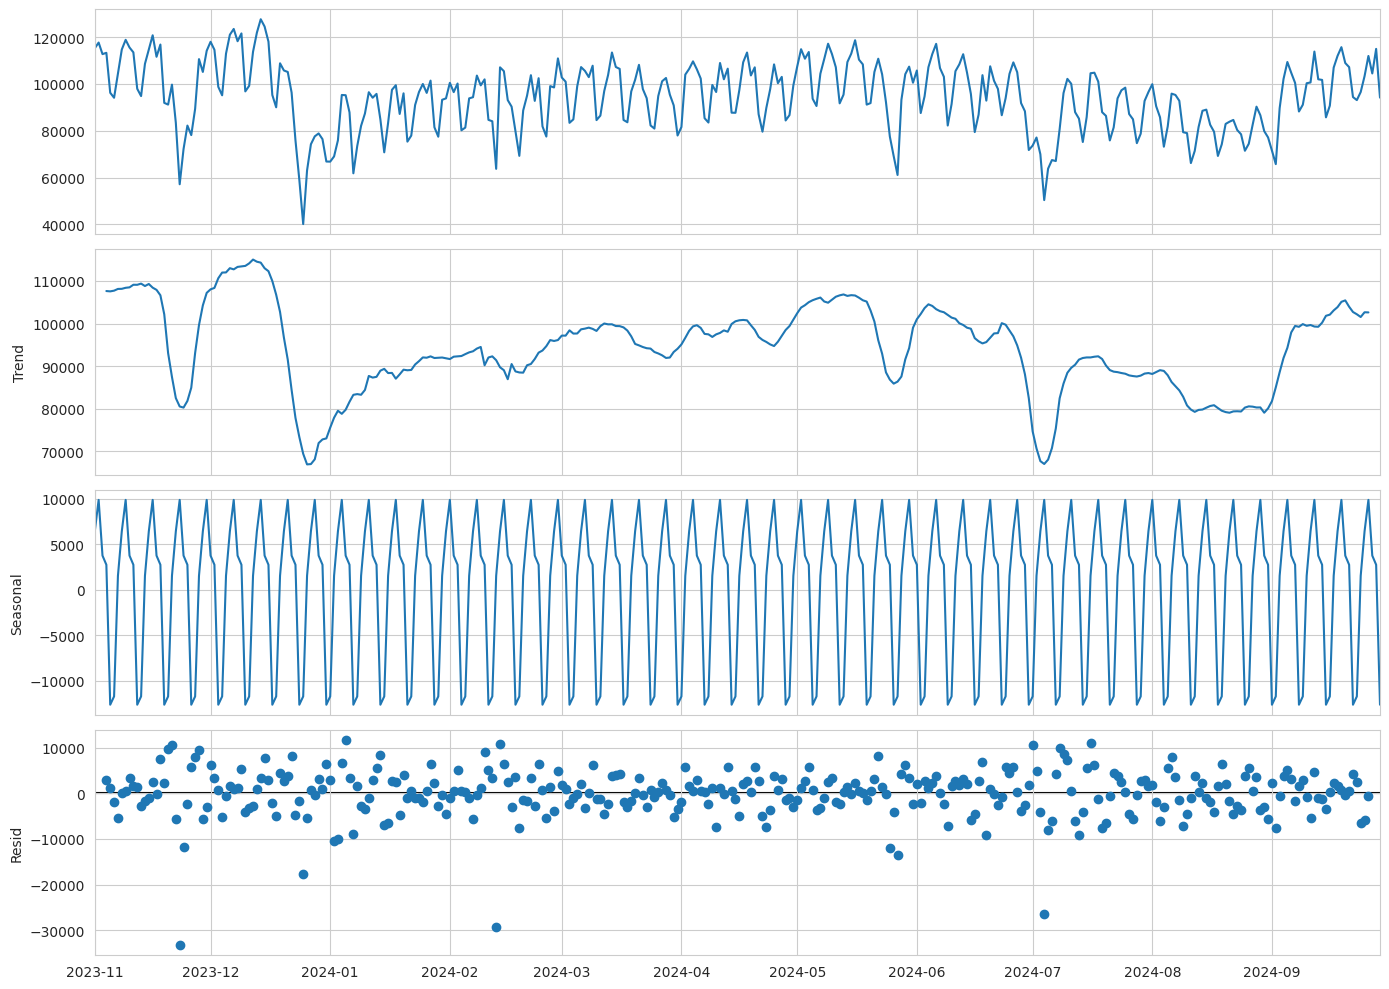

In [32]:
# Ensure there are no missing dates
daily_trips = daily_trips.asfreq('D')

# Fill missing values with zero (no trips on that day)
daily_trips.fillna(0, inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(daily_trips, model='additive', period=7)  # Weekly seasonality

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

In [35]:
df["DOLocationID"]

tpep_pickup_datetime
2023-11-01 00:03:03     26
2023-11-01 00:03:50    236
2023-11-01 00:06:30    141
2023-11-01 00:17:18    263
2023-11-01 00:14:49     62
                      ... 
2024-09-29 23:58:10    100
2024-09-29 23:56:13    191
2024-09-29 23:56:50    198
2024-09-29 23:45:18     48
2024-09-29 23:58:07     15
Name: DOLocationID, Length: 31528148, dtype: int32

## Geo Spatial Analysis

### Location ID to Latitude and Longitude

In [51]:
import json
import pandas as pd

# Load the GeoJSON file
geojson_file_path = 'NYC Taxi Zones.geojson'
with open(geojson_file_path, 'r') as f:
    geojson_data = json.load(f)

# Extract the relevant properties for mapping
zone_mapping = [
    {
        'location_id': int(feature['properties']['location_id']),
        'zone': feature['properties']['zone'],
        'borough': feature['properties']['borough'],
        'latitude': feature['geometry']['coordinates'][0][0][1] if feature['geometry']['type'] == 'Polygon' else feature['geometry']['coordinates'][0][0][0][1],
        'longitude': feature['geometry']['coordinates'][0][0][0] if feature['geometry']['type'] == 'Polygon' else feature['geometry']['coordinates'][0][0][0][0]
    }
    for feature in geojson_data['features']
]

# Convert the mapping to a DataFrame for analysis
zone_mapping_df = pd.DataFrame(zone_mapping)

# Display the first few rows to understand the structure
print(zone_mapping_df.head())

output_csv_path = 'taxi_zone_mapping_with_coordinates.csv'
zone_mapping_df.to_csv(output_csv_path, index=False)
print(f"Taxi zone mapping with coordinates saved to: {output_csv_path}")


   location_id                     zone        borough   latitude  longitude
0            1           Newark Airport            EWR  40.694996 -74.184453
1            2              Jamaica Bay         Queens  40.638987 -73.823376
2            3  Allerton/Pelham Gardens          Bronx  40.871342 -73.847926
3            4            Alphabet City      Manhattan  40.725821 -73.971774
4            5            Arden Heights  Staten Island  40.562568 -74.174217
Taxi zone mapping with coordinates saved to: taxi_zone_mapping_with_coordinates.csv


In [45]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'trip_duration', 'pickup_hour',
       'pickup_day_of_week', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'tip_amount', 'total_amount'],
      dtype='object')

In [46]:
zone_mapping_df.columns

Index(['location_id', 'zone', 'borough', 'latitude', 'longitude'], dtype='object')

In [1]:
# Merge for pickup locations
df = df.merge(zone_mapping_df, how='left', left_on='PULocationID', right_on='location_id', suffixes=('', '_pickup'))
df.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough',
    'latitude': 'pickup_latitude',
    'longitude': 'pickup_longitude'
}, inplace=True)
df.drop(columns=['location_id'], inplace=True)

# Merge for drop-off locations
df = df.merge(zone_mapping_df, how='left', left_on='DOLocationID', right_on='location_id', suffixes=('', '_dropoff'))
df.rename(columns={
    'zone': 'dropoff_zone',
    'borough': 'dropoff_borough',
    'latitude': 'dropoff_latitude',
    'longitude': 'dropoff_longitude'
}, inplace=True)
df.drop(columns=['location_id'], inplace=True)

# Display the first few rows to ensure the merge worked correctly
print(df.head())

NameError: name 'df' is not defined

In [53]:
df.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'trip_duration', 'pickup_hour',
       'pickup_day_of_week', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'tip_amount', 'total_amount', 'pickup_zone', 'pickup_borough',
       'pickup_latitude', 'pickup_longitude', 'dropoff_zone',
       'dropoff_borough', 'dropoff_latitude', 'dropoff_longitude'],
      dtype='object')

In [55]:
# Calculate counts for pickup and drop-off trips
pickup_counts = df.groupby('pickup_zone').size().reset_index(name='pickup_incident_count')
dropoff_counts = df.groupby('dropoff_zone').size().reset_index(name='dropoff_incident_count')

# Merge counts back into the dataset
merged_counts = pd.merge(df, pickup_counts, on='pickup_zone', how='left')
merged_counts = pd.merge(merged_counts, dropoff_counts, on='dropoff_zone', how='left')

# Fill NaN values with 0 for zones without incidents
merged_counts['pickup_incident_count'] = merged_counts['pickup_incident_count'].fillna(0)
merged_counts['dropoff_incident_count'] = merged_counts['dropoff_incident_count'].fillna(0)

# Save datasets to CSV for Tableau
merged_counts.to_csv('heatmap_data.csv', index=False)

KeyboardInterrupt: 